### ***Importing Required Packages***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

In [2]:
# Imporing the dataset

df = pd.read_csv("/content/drive/MyDrive/Datasets/medical_insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


### ***Feature Engineering***

In [4]:
# Checking for null values
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [5]:
# Encoding Categorical values
ohe = OneHotEncoder(handle_unknown= 'ignore', sparse_output= False).set_output(transform = 'pandas')
sex_transformed = ohe.fit_transform(df[['sex']])
smoker_transformed = ohe.fit_transform(df[['smoker']])
region_transformed = ohe.fit_transform(df[['region']])

In [6]:
smoker_transformed

,smoker_no,smoker_yes
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
2767,1.0,0.0
2768,1.0,0.0
2769,0.0,1.0
2770,1.0,0.0


In [7]:
sex_transformed

,sex_female,sex_male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
2767,1.0,0.0
2768,1.0,0.0
2769,0.0,1.0
2770,0.0,1.0


In [8]:
region_transformed

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
2767,0.0,0.0,1.0,0.0
2768,0.0,0.0,0.0,1.0
2769,0.0,1.0,0.0,0.0
2770,0.0,1.0,0.0,0.0


In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [10]:
# Concatinating the encoded series
final_data = pd.concat([df, sex_transformed, smoker_transformed, region_transformed], axis = 1).drop(['sex', 'smoker', 'region',], axis = 1) # To avoid dummy variable trap

In [11]:
final_data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,45.320,1,8569.86180,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2768,21,34.600,0,2020.17700,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2769,19,26.030,1,16450.89470,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2770,23,18.715,0,21595.38229,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [12]:
# Checking for correlation
final_data_corr = final_data[['age', 'bmi', 'children', 'charges', 'sex_female', 'smoker_yes']].corr()

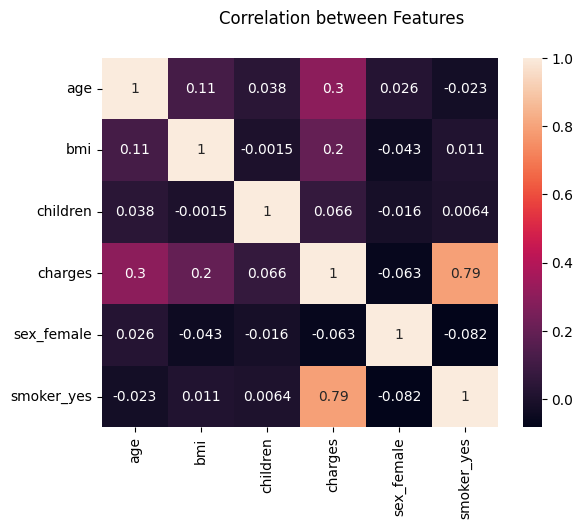

<Figure size 1600x1400 with 0 Axes>

In [13]:
sns.heatmap(final_data_corr, annot = True)
plt.suptitle('Correlation between Features')
plt.figure(figsize = (16,14))
plt.show()

In [14]:
final_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [15]:
final_data = final_data[['age', 'bmi', 'children', 'sex_male', 'sex_female','smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'charges']]

In [16]:
final_data.iloc[:,:-1]

,age,bmi,children,sex_male,sex_female,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2767,47,45.320,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2768,21,34.600,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2769,19,26.030,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2770,23,18.715,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [17]:
# Splitting the training and test data
x_train, x_test, y_train, y_test = train_test_split(final_data.iloc[:,:-1], df.iloc[:,-1], test_size = 0.05, random_state = 204)

In [18]:
print("X_train shape:", x_train.shape)
print("Y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_test.shape)

X_train shape: (2633, 11)
Y_train shape: (2633,)
X_test shape: (139, 11)
Y_train shape: (139,)


In [19]:
final_data.columns

Index(['age', 'bmi', 'children', 'sex_male', 'sex_female', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'charges'],
      dtype='object')

In [20]:
# Feature Visualization
feature_title = ['age', 'bmi', 'children', 'sex_male', 'sex_female', 'smoker_no', 'smoker_yes', 'northeast', 'northwest', 'southeast', 'southwest']

In [21]:
plt.style.use('ggplot')

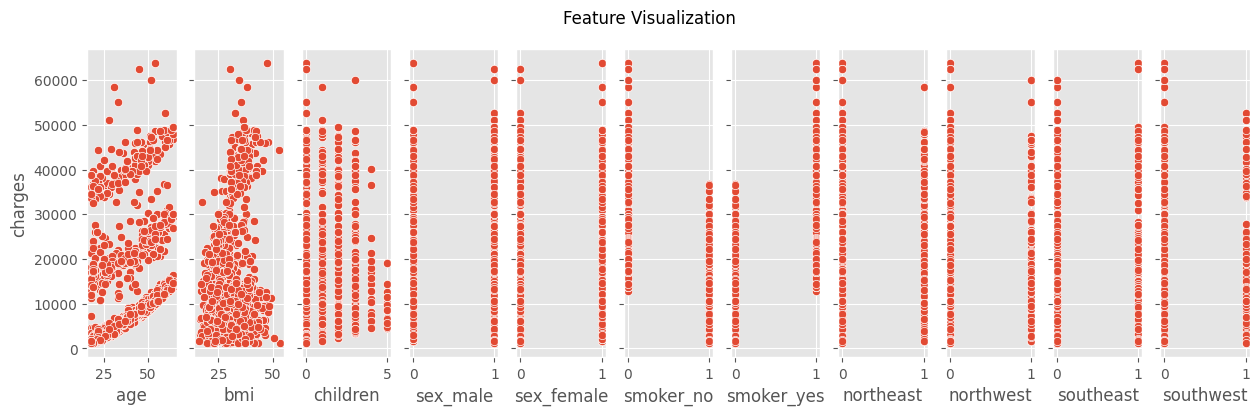

In [22]:
fig, ax = plt.subplots(1, x_train.shape[1], sharey = True, figsize = (15,4))
for i in range(len(ax)):
  sns.scatterplot(x = x_train.iloc[:,i], y = y_train, marker = 'o', ax = ax[i])
  ax[i].set_xlabel(feature_title[i])
fig.suptitle('Feature Visualization')
plt.show()

In [23]:
final_data.columns

Index(['age', 'bmi', 'children', 'sex_male', 'sex_female', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'charges'],
      dtype='object')

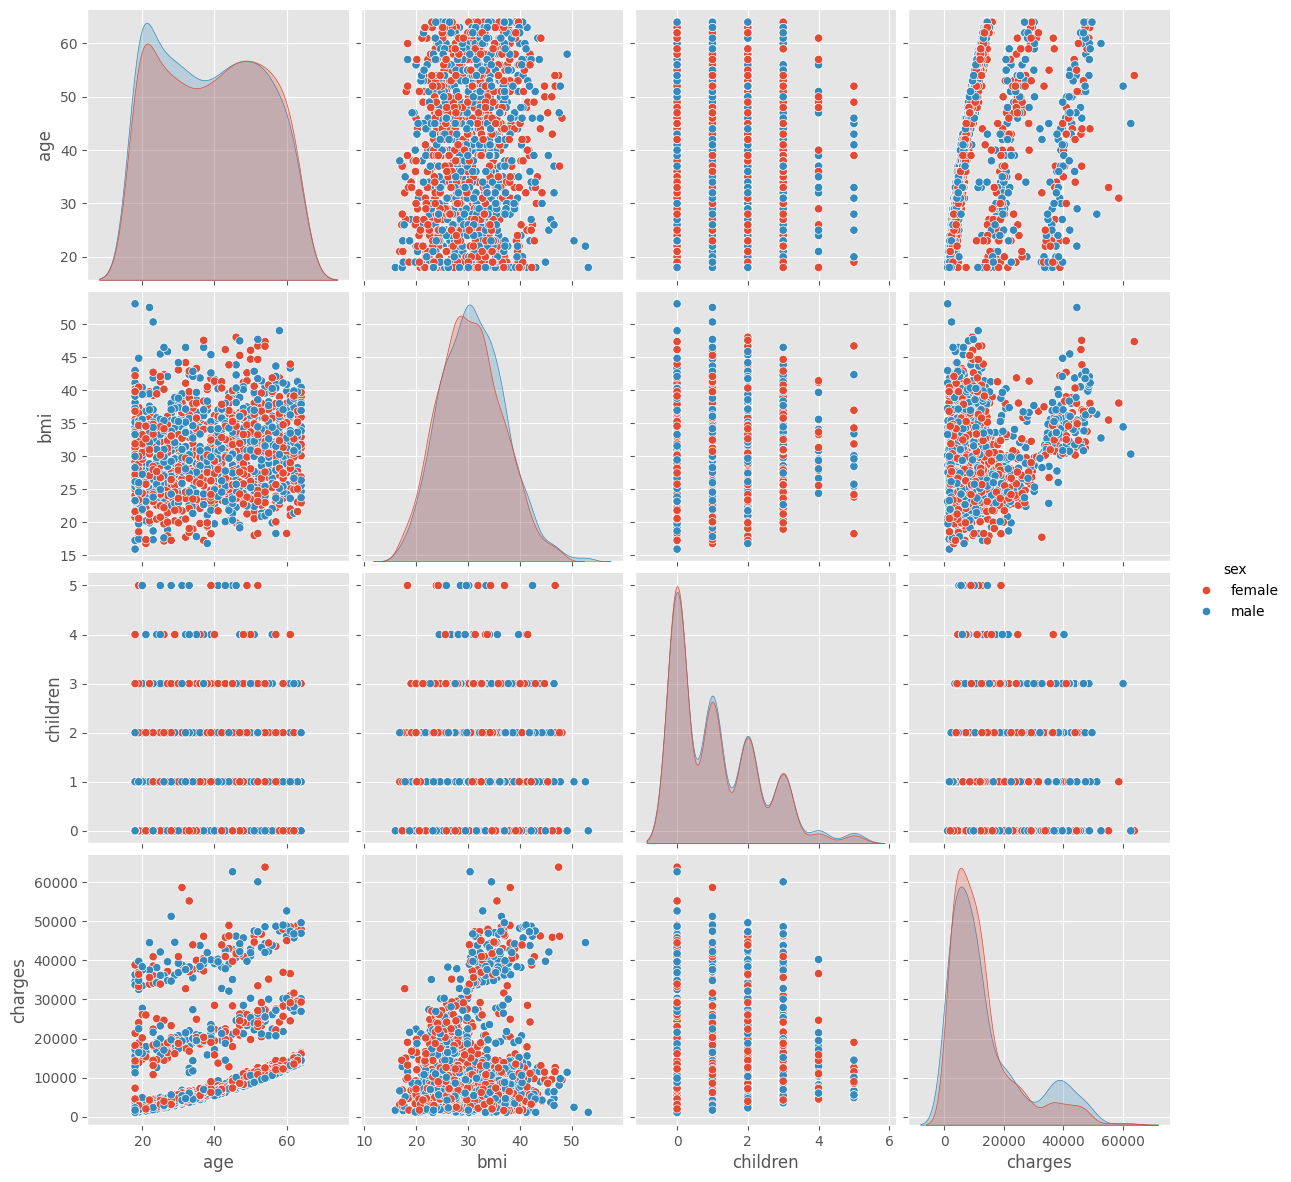

In [24]:
sns.pairplot(data = df, vars = ['age', 'bmi', 'children', 'charges'], hue = 'sex', height = 3.0)
plt.show()

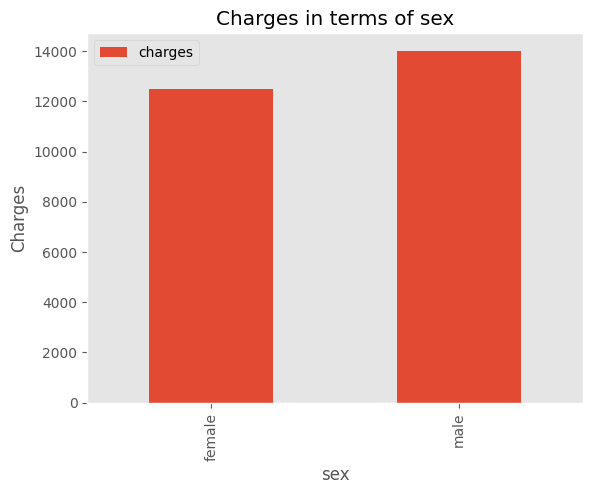

In [25]:
df.groupby('sex').agg({'charges':'mean'})\
.plot(kind = 'bar', title = 'Charges in terms of sex', ylabel = 'Charges', grid = False)
plt.show()

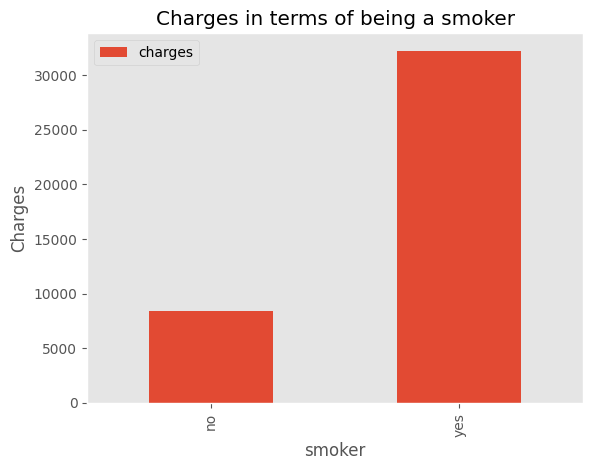

In [26]:
df.groupby('smoker').agg({'charges': 'mean'})\
.plot(kind = 'bar', grid = False, title = 'Charges in terms of being a smoker', ylabel = 'Charges')
plt.show()

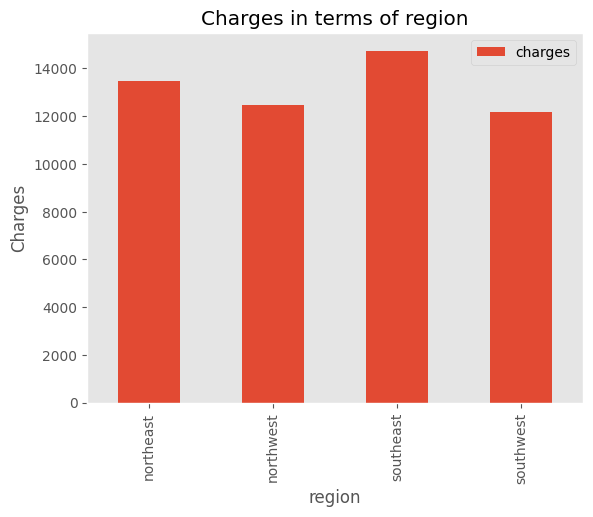

In [27]:
df.groupby('region').agg({'charges': 'mean'})\
.plot(kind = 'bar', ylabel = 'Charges', grid = False, title = 'Charges in terms of region')
plt.show()

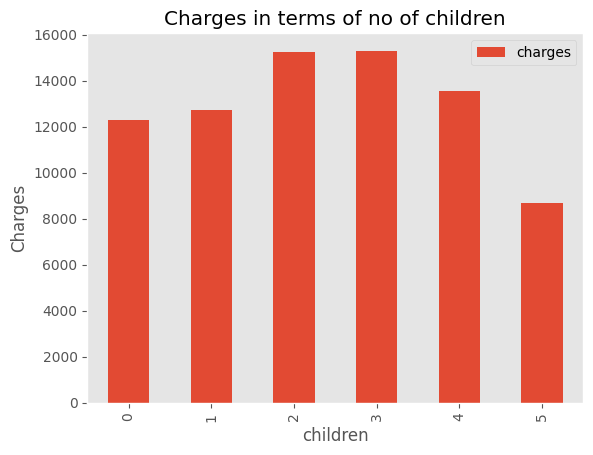

In [28]:
df.groupby('children').agg({'charges': 'mean'})\
.plot(kind = 'bar', ylabel = 'Charges', grid = False, title = 'Charges in terms of no of children')
plt.show()

### ***Making Prediction***

In [29]:
# Normalizing the values
normalizer = StandardScaler()
x_train_norm = normalizer.fit_transform(x_train)
x_test_norm = normalizer.fit_transform(x_test)

In [40]:
regressor = SGDRegressor(max_iter = 10000, alpha = 0.0000001)
regressor.fit(x_train_norm, y_train)
y_pred = regressor.predict(x_test_norm)

In [41]:
regressor.score(x_test_norm, y_test)

0.7874429454596382

In [31]:
# Viewing parameters
print('Weight: ')
print(regressor.coef_, end = '\n\n')
print('Bias: ')
print(regressor.intercept_, end = '\n\n')
print('Alpha: ')
print(regressor.alpha)

Weight: 
[ 3627.87096183  1960.73125444   571.75966092   -48.1404066
    48.1404066  -4756.57032329  4756.57032329   358.74207336
   103.39107363  -302.81089557  -142.25821308]

Bias: 
[13126.96295958]

Alpha: 
1e-06


In [32]:
print("Truth:", y_test.values.flatten()[10:14])
print("Prediction: ", y_pred[10:14])
print('Accuracy: ')
regressor.score(x_test_norm, y_test)

Truth: [10807.4863  8232.6388  2020.177  39241.442 ]
Prediction:  [12353.00376797  8597.79251524  3728.01336456 30063.20582852]
Accuracy: 


0.7891044156738899

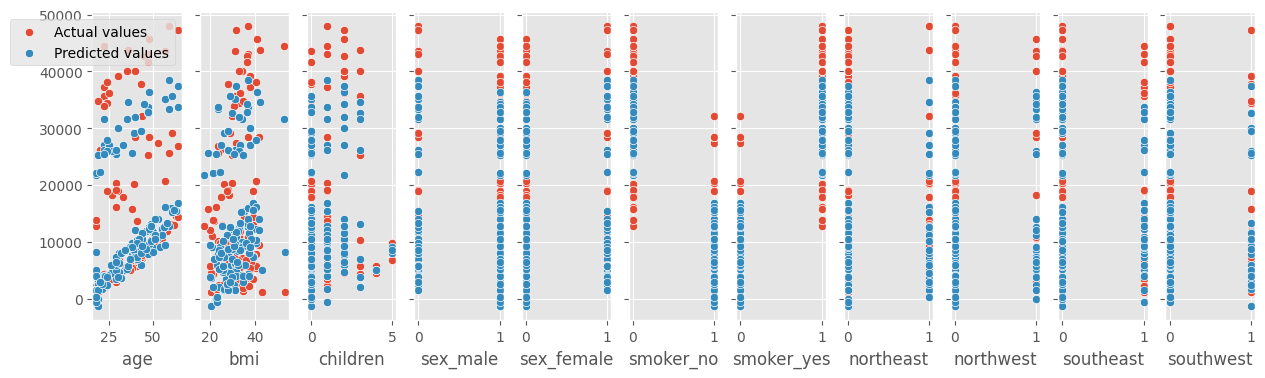

In [33]:
fig, ax = plt.subplots(1, x_train.shape[1], sharey = True, figsize = (15,4))
for i in range(len(ax)):
  sns.scatterplot(x = x_test.iloc[:,i], y = y_test.values.flatten(), ax = ax[i])
  ax[i].set_xlabel(feature_title[i])
  sns.scatterplot(x = x_test.iloc[:,i], y = y_pred, ax = ax[i])
ax[0].legend(labels = ['Actual values', 'Predicted values'])

In [42]:
# Saving the Trained Model
import pickle

In [43]:
filename = "trained_model.sav"
pickle.dump(regressor, open(filename, 'wb'))

In [44]:
# Loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [48]:
input_data = (29, 27.200, 2, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0)
input_data_numpy_arr = np.asarray(input_data)
input_data_reshaped = input_data_numpy_arr.reshape(1,-1)
input_data_norm = normalizer.fit_transform(input_data_reshaped)

In [63]:
loaded_model.predict(input_data_norm)

array([13228.98415985])